Numerical Solutions to ODEs, Part II (Runge-Kutta)
==========================================

Christopher Tripp | March 2018

Error and Euler
----------------
Consider the function $g(t)$, and let us first recall the form of one iteration in the explicit (forward) Euler method, which gives us the *approximate* value of $g(t + h)$:
$$g_{\text{approx}}(t + h) = g(t) + h\frac{dg(t)}{dt}$$

Now, let us recall the Taylor series expansion, which gives us the *exact* value of $g(t + h)$:
$$g_{\text{exact}}(t + h) = g(t) + h\frac{dg(t)}{dt} + O(h^2)$$

By taking the difference between these two, we see immediately that the *local* truncation error (that is, the error introduced by one iteration, and due to taking a finite approximation of a definition involving a limit) is approximately proportional to $h^2$.

If we also note that the number of iterations on a fixed time interval is proportional to $1/h$, then we see that the cumulative truncation error introduced by many iterations (known as the *global* truncation error) will be proportional to $h$.  For this reason, Euler's method is sometimes called a *first-order method*.

Midpoint Method
------------
We can improve upon Euler's method by reducing this error.  At each iteration, we first take the initial derivative to find an approximate value for $g$ at $t + h/2$, midway across the interval:
$$m(t) = g(t) +  \frac{h}{2} \frac{dg(t)}{dt} $$
We then find the slope of $g$ at that midpoint, and use it in our approximation of the value of $g$ at $t$ (i.e. at the end of the whole interval):
$$g_{\text{approx}}(t + h) = g(t) + h\frac{dm(t)}{dt}$$

If we compare this with the Taylor series, as we did with Euler's Method, we see that the local truncation error term this time is $O(h^3)$.  The global truncation error is therefore proportional to $h^2$.  For this reason, the midpoint method can be called a *second-order method*.

Runge-Kutta (RK4) Method
------------
The Runge-Kutta method uses four different increments $k_i$:

First, it finds an increment $k_1$ based on the initial derivative (this is just the increment from Euler's method).  

Then, it finds an increment $k_2$ by approximating the value of $g$ at a midpoint on the interval by using Euler's method (that is, $k_1$ but now with time $t + h/2$), and making an increment across the whole interval based on the slope at this midpoint.

Then, it finds an increment $k_3$ by approximating in a different way the value of $g$ at midpoint on the interval by using Euler's method but via the slope found previously in $k_2$ rather than the initial derivative.  It then finds the slope at this new midpoint approximation and uses it to make an increment across the whole interval.

Finally, it finds an increment $k_4$ by first using $k_3$ to approximate the value of $g$ at the end of the interval, and then using the slope at that endpoint approximation to make an increment across the whole interval.

\begin{align}
k_1 &= hf(t_n, g_n) \\[0.5 em]
k_2 &= hf(t_n + \tfrac{1}{2}h, g_n + \tfrac{1}{2}k_1) \\[0.5 em]
k_3 &= hf(t_n + \tfrac{1}{2}h, g_n + \tfrac{1}{2}k_2) \\[0.5 em]
k_3 &= hf(t_n + h, g_n + k_3) \\[0.5 em]
\end{align}

Note here that $g_n + \tfrac{1}{2}k_1$ corresponds to an Euler step with step-size $h$ starting from $(t_n, g_n)$.  Therefore, $k_2$ corresponds to the slope of the solution one would get by taking one Euler step with step-size $h$ starting from $(t_n, g_n)$.

Runge-Kutta then approximates the value of $g$ at the end of the interval by using a weighted average of these increments:

$$g_{\text{approx}}(t + h) = g(t) + \tfrac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

Comparing this with the Taylor series reveals that the local truncation error term for Runge-Kutta is $O(h^5)$, and global truncation error is therefore proportional to $h^4$.



Converting Higher Order Differential Equations to First-Order
------------

Suppose we are given the third-order differential equation
$$ \frac{d^3g}{dt^3} = \beta \frac{d^2g}{dt^2} + \gamma \frac{dg}{dt} + \zeta g + \eta$$
and let us define some new variables:

\begin{align}
a_0 &= g \\[0.5em]
a_1 &= \frac{dg}{dt} \\[0.5em]
a_2 &= \frac{d^2g}{dt^2} \\
\end{align}


This allows us to convert our original second-order differential equation into a system of first-order differential equations:

\begin{align}
\frac{da_0}{dt} &= a_1 \\[0.5em]
\frac{da_1}{dt} &= a_2 \\[0.5em]
\frac{da_2}{dt} &= \beta a_2 + \gamma a_1 + \zeta a_0 + \eta
\end{align}

In particular, we note that in each of these equations we have the first derivative of one of our new variables $a_n$ equal to a linear combination of the $a_i$.  We can express this result generally: any $n$th-order differential equation can be expressed as a system of $n$ coupled first-order differential equations of the form

$$\frac{da_i}{dt} = f_i(t, a_0, a_1, \ldots, a_{n-1})$$
for $i = 0, 1, 2, \ldots, n-1$.



Implementing RK4
----------------------
Now let's implement the RK4 method to solve an $n$th-order differential equation. Let's test it with a relatively simple differential equation: damped harmonic oscillation, where
$$\frac{d^2x}{dt^2} = -\omega^2x - 0.15\omega \frac{dx}{dt}$$

with $\omega = 3$ radians/second, and initial conditions $x = 2.5$ meters, $\frac{dx}{dt} = 1.3$ meters/second.

In [180]:
#python 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let **a** be an $n$-dimensional vector containing the functions $a_0, a_1, \ldots, a_{n-1}$, so that **a[0]** $= a_0$, etc.  For the purposes of our damped harmonic oscillator, we have $n=3$, and $a_0 = x$, $a_1 = \frac{dx}{dt}$, and $a_2 = \frac{d^2x}{dt^2}$.

Now, as described in the previous section we can convert the given second-order differential equation to a system of first-order differential equations by declaring $a_0 = x$ and proceeding as follows:
\begin{align}
\frac{da_0}{dt} &= a_1 \\[0.5em]
\frac{da_1}{dt} &= -(\omega)^2 a_0 - 0.15\omega a_1
\end{align}

We now need to create a function **f** which essentially performs this conversion into first-order diff eqns by taking the array **a** $= a_i$ and returning an array **da_dt** $= \frac{da_i}{dt}$.

In [181]:
#take the array of a_i values and return the array of their derivatives, based on the diff eq we're trying to solve
def f(a, t):  
    #initialize derivative array
    da_dt = np.zeros(len(a))
    
    #a_0 = x
    
    #d(a_0)/dt = a_1
    da_dt[0] = a[1]
    
    #this is the one that really encodes the diff eq we're trying to solve
    #d(a_1)/dt = (-(omega^2))*a_0 - (0.15*omega*a_1)
    da_dt[1] = (-(3.0**2))*a[0] - (0.15*3.0*a[1])

    return da_dt

Now let's create a function which takes the values **a**$_{\text{old}}$ of all these functions $a_i$ at time $t$, and returns their values **a**$_{\text{new}}$ at the time $t + h$, as calculated using the RK4 equations.

In [182]:
#take an array of our variables a_i at time=t and return array a_i at time=(t+h) using RK4 method
def rungekutta(old_vals, t, h):
    k1 = h*(f(old_vals, t))
    k2 = h*(f((old_vals + (0.5*k1)), (t + (0.5*h))))
    k3 = h*(f((old_vals + (0.5*k2)), (t + (0.5*h))))
    k4 = h*(f((old_vals + k3), (t + h)))
    return (old_vals + ((1.0/6.0)*(k1 + (2*k2) + (2*k3) + k4)))

In [173]:
def basic_plot(ind_var, dep_var, style, x_label, y_label, title):
    plt.figure(dpi=100)
    plt.plot(ind_var, dep_var, style)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.legend()
    plt.title(title)
    plt.show()

In [183]:
def ode_rk4_solver():
    #define the step
    h = 0.01
    
    #define the order of the original diff eq to be solved
    order = 2

    #initial time value
    t_init = 0
    
    #for an initial value problem, initial conditions are given for all the a_i
    a0_init = 2.5
    a1_init = 1.3

    #define the extent of the time interval we shall plot
    t_final = 20

    #create and initialize time array
    time_vals = np.arange(t_init, t_final, h)    
    
    #create and initialize a_i array
    a = np.zeros(order)
    a[0] = a0_init
    a[1] = a1_init
    
    #since a_0 is the function we're trying to solve for, create an array for the values of a_0 at each time
    a_0_solutions = np.zeros(len(time_vals))
    a_0_solutions[0] = a0_init #initialize
    
    #for each time t, use RK4 to find value of a_i at time=(t+h), then save a_0(t+h) into the array of a_0 values
    for t_n in np.arange(1, len(time_vals), 1):
        a = rungekutta(a, t_n, h)
        a_0_solutions[t_n] = a[0]
        
    #plot a_0 values against time    
    basic_plot(time_vals, a_0_solutions, "r-", "time (s)", "displacement (m)", "damped harmonic oscillation")

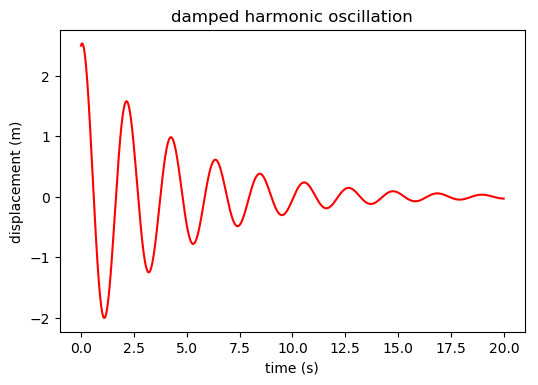

In [184]:
ode_rk4_solver()

Next step is to maybe to compare accuracy (and processing time?) of this result with those obtained via Euler's method, etc. but I ran out of time this week.  Also need try this with more interesting diff eqs...

**Sources:**

Numerical Recipes, 17.0 and 17.1

http://pmaweb.caltech.edu/~physlab/lab_22_current/Ph22_1_ODEs.pdf

https://en.wikipedia.org/wiki/Euler_method

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods